In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("C:/Users/sumit/Downloads/titanic.csv")

In [3]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#Average age of survivors vs. non-survivors

avg_age = data.groupby("Survived")["Age"].mean()
avg_age

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

In [8]:
#Survival rate by passenger class and gender

survival_rate = data.pivot_table(values ="Survived",index = "Pclass",columns = "Sex",aggfunc = "mean")*100
survival_rate

Sex,female,male
Pclass,,
1,96.808511,36.885246
2,92.105263,15.740741
3,50.000000,13.544669


In [12]:
#Find the cabin letter that appears most frequently

cabin_nan = data["Cabin"].dropna().str[0]
cabin_counts = cabin_nan.value_counts()
most_frequent = cabin_counts.idxmax()
counts = cabin_counts.max()

print("Most frequent cabin letter:", most_frequent)
print("Count:", counts)

Most frequent cabin letter: C
Count: 59


In [14]:
#Which embarkation port had the highest survival rate?

emb_port = data.groupby("Embarked")["Survived"].mean()*100
emb_port

Embarked
C    55.357143
Q    38.961039
S    33.695652
Name: Survived, dtype: float64

In [20]:
#Correlation between fare and survival

corr = data["Fare"].corr(data["Survived"])
print("correlation b/w fare and survival is:", corr)

correlation b/w fare and survival is: 0.2573065223849622


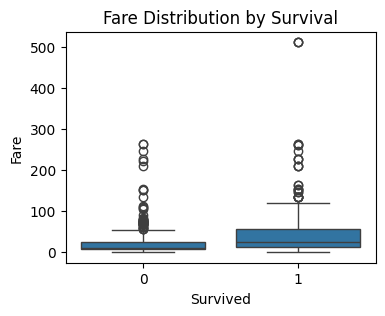

In [22]:
plt.figure(figsize = (4,3))
sns.boxplot(x="Survived", y="Fare", data=data)
plt.title("Fare Distribution by Survival")
plt.show()

In [33]:
#Find the most “overpriced” passenger in each class

data["FamilySize"] = data["SibSp"] +data["Parch"] + 1
data["fare_per_person"] = data["Fare"]/data["FamilySize"]
overpriced_passengers = data.loc[data.groupby("Pclass")["fare_per_person"].idxmax(),["Pclass","FamilySize","fare_per_person","Name","Fare"]]
overpriced_passengers

,Pclass,FamilySize,fare_per_person,Name,Fare
258,1,1,512.3292,"Ward, Miss. Anna",512.3292
72,2,1,73.5000,"Hood, Mr. Ambrose Jr",73.5000
74,3,1,56.4958,"Bing, Mr. Lee",56.4958


In [34]:
#Build a “family size” feature and check its effect on survival

data["FamilySize"] = data["SibSp"] + data["Parch"] +1
survival_rate = data.groupby("FamilySize")["Survived"].mean()*100
survival_rate

FamilySize
1     30.353818
2     55.279503
3     57.843137
4     72.413793
5     20.000000
6     13.636364
7     33.333333
8      0.000000
11     0.000000
Name: Survived, dtype: float64

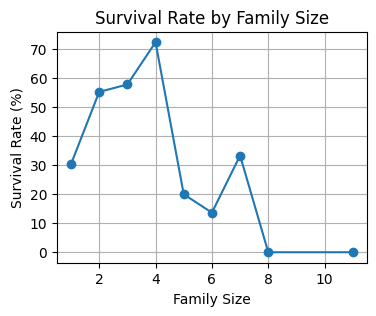

In [35]:
plt.figure(figsize = (4,3))
plt.plot(survival_rate.index, survival_rate.values, marker='o')
plt.xlabel("Family Size")
plt.ylabel("Survival Rate (%)")
plt.title("Survival Rate by Family Size")
plt.grid(True)
plt.show()


In [ ]:
#Insights of Familysize vs survival rate
    #Small families (2–4) had better survival rates.
    #Single travelers had lower survival rates.
    #Very large families had poor survival chances.

In [41]:
#Detect possible data entry errors in Age,Find passengers with Age < 1 (infants) and Age > 70 — check their survival rate compared to others.

infant = data[data["Age"] <1]
survival_infant_rate = infant["Survived"].mean()*100

elder = data[data["Age"]>70]
survival_rate_elder = older["Survived"].mean()*100

other = data[(data["Age"]>=1) & (data["Age"]<= 70)]
survival_rate_other = other["Survived"].mean()*100

print("Suvival rate of infant is :",survival_infant_rate )
print("Suvival rate of elder is :",survival_rate_elder )
print("Suvival rate of other is :",survival_rate_other )

Suvival rate of infant is : 100.0
Suvival rate of elder is : 20.0
Suvival rate of other is : 40.17094017094017


In [42]:
#Which gender benefited most from higher fares?

median_fare = data["Fare"].median()

data["FareGroup"] = data["Fare"].apply(lambda x: "High" if x > median_fare else "Low")

survival_comparison = (data.groupby(["Sex", "FareGroup"])["Survived"].mean().unstack() * 100)

print(f"Median Fare: {median_fare}")
print(survival_comparison.round(2))      #"round 2" means rounding the survival rates by 2 decimal places.


Median Fare: 14.4542
FareGroup   High    Low
Sex                    
female     78.43  66.36
male       29.17  11.57


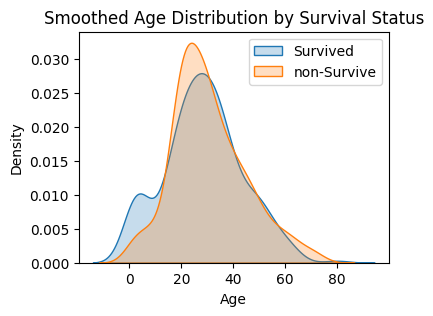

In [47]:
#Visualize survival probability by age using smoothing
#Create a smoothed line plot (e.g., with seaborn’s kdeplot)
#Show probability curves for survivors vs. non-survivors.

plt.figure(figsize=(4, 3))

sns.kdeplot(data=data[data["Survived"] == 1],x="Age",fill=True,label="Survived",common_norm=False)

sns.kdeplot(data=data[data["Survived"] == 0],x="Age",fill=True,label="non-Survive",common_norm=False)

plt.title("Smoothed Age Distribution by Survival Status")
plt.xlabel("Age")
plt.ylabel("Density")
plt.legend()
plt.show()


In [51]:
#Identify “VIP” passengers
    #Define VIPs as passengers with:
        #Fare in the top 5%
        #AND either Pclass == 1 OR Cabin not null
#Check how many of these VIPs survived.


fare_threshold = data["Fare"].quantile(0.95)

vip_condition = (data["Fare"] >= fare_threshold) & ((data["Pclass"] == 1) | data["Cabin"].notna())

vip_passengers = data[vip_condition]

total_vips = len(vip_passengers)
vip_survival_rate = vip_passengers["Survived"].mean() * 100

print(f"Fare threshold for top 5%: {fare_threshold}")
print(f"Total VIPs: {total_vips}")
print(f"VIP survival rate: {vip_survival_rate:.2f}%")

vip_passengers[["Name", "Pclass", "Fare", "Cabin", "Survived","Age"]]

Fare threshold for top 5%: 112.07915
Total VIPs: 45
VIP survival rate: 75.56%


,Name,Pclass,Fare,Cabin,Survived,Age
27,"Fortune, Mr. Charles Alexander",1,263.0000,C23 C25 C27,0,19.00
31,"Spencer, Mrs. William Augustus (Marie Eugenie)",1,146.5208,B78,1,NaN
88,"Fortune, Miss. Mabel Helen",1,263.0000,C23 C25 C27,1,23.00
118,"Baxter, Mr. Quigg Edmond",1,247.5208,B58 B60,0,24.00
195,"Lurette, Miss. Elise",1,146.5208,B80,1,58.00
215,"Newell, Miss. Madeleine",1,113.2750,D36,1,31.00
258,"Ward, Miss. Anna",1,512.3292,NaN,1,35.00
268,"Graham, Mrs. William Thompson (Edith Junkins)",1,153.4625,C125,1,58.00
269,"Bissette, Miss. Amelia",1,135.6333,C99,1,35.00
297,"Allison, Miss. Helen Loraine",1,151.5500,C22 C26,0,2.00


C:\Users\sumit\AppData\Local\Temp\ipykernel_24624\3460954501.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=vip_comparison,x="VIP",y="SurvivalRate",palette=["gold", "gray"])


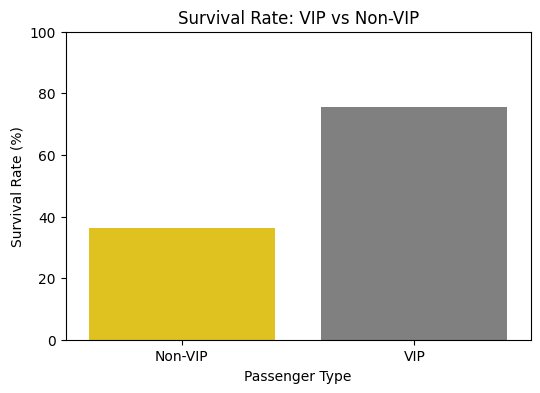

In [52]:
data["VIP"] = vip_condition

vip_comparison = data.groupby("VIP")["Survived"].mean().reset_index()     #.reset_index() → turns the group labels (True/False) back into a regular column instead of an index.
vip_comparison["SurvivalRate"] = vip_comparison["Survived"] * 100
vip_comparison["VIP"] = vip_comparison["VIP"].map({True: "VIP", False: "Non-VIP"})

plt.figure(figsize=(6, 4))
sns.barplot(data=vip_comparison,x="VIP",y="SurvivalRate",palette=["gold", "gray"])
plt.ylabel("Survival Rate (%)")
plt.xlabel("Passenger Type")
plt.title("Survival Rate: VIP vs Non-VIP")
plt.ylim(0, 100)
plt.show()